In [1]:
import warnings
import os
from math import sqrt

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.externals import joblib
from sklearn import preprocessing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
from bidi import algorithm as bidialg
%matplotlib inline

warnings.filterwarnings("ignore")

In [2]:
try:
    df = pd.read_csv("data/data_deals_done.csv")
    print(df.columns)
    print(df.shape)
except Exception:
    print("Seems we have a problem")

Index(['_id', 'sale_day', 'address', 'property_type', 'rooms_number', 'floor',
       'build_year', 'building_mr', 'city', 'street', 'street_number',
       'neighborhood', 'address_area', 'address_neighborhood', 'sale_day_year',
       'sale_day_month', 'final_price'],
      dtype='object')
(304431, 17)


In [3]:
used_features = [
    'street', 
    'neighborhood',
    'property_type', 
    'rooms_number', 
    'floor',
    'build_year', 
    'building_mr',
    'city',
    'sale_day_year'
]

In [4]:
#------------------------------------------------------------------------------
# accept a dataframe, remove outliers, return cleaned data in a new dataframe
# see http://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
#------------------------------------------------------------------------------
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out


In [5]:
X = df[used_features]
y = df['final_price']


In [6]:
cities = [
    "תל אביב יפו",
    "חיפה",
    "באר שבע",
    "ירושלים",
    "פתח תקווה",
    "אשדוד",
    "אשקלון",
    "נתניה",
    "ראשון לציון",
    "חולון",
    "רמת גן",
    "בת ים",
    "רחובות",
    "חדרה",
    "נהריה",
    "אילת",
    "קרית אתא",
    "עפולה",
    "בני ברק",
    "לוד"
]

test_size = 0.3

cities = {city: {"processor": None, "algo": None} for city in cities}


תל אביב יפו
(21894, 17)
(21894, 971)


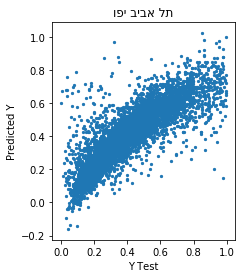

Mean squared error: 0.01
Mean squared error sqrt: 0.10589628589495506
Variance score: 0.71
חיפה
(20389, 17)
(20389, 699)


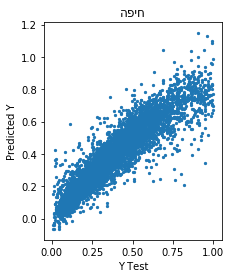

Mean squared error: 0.01
Mean squared error sqrt: 0.08243761707914615
Variance score: 0.85
באר שבע
(18111, 17)
(18111, 607)


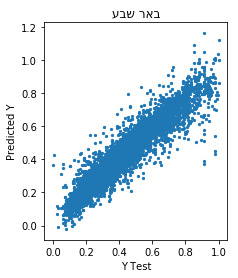

Mean squared error: 0.01
Mean squared error sqrt: 0.07145467269556886
Variance score: 0.87
ירושלים
(20122, 17)
(20122, 850)


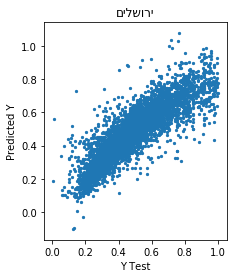

Mean squared error: 0.01
Mean squared error sqrt: 0.08775947172823657
Variance score: 0.76
פתח תקווה
(13808, 17)
(13808, 586)


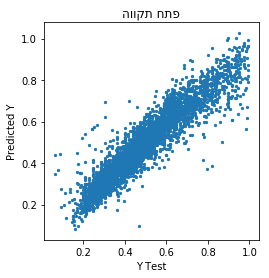

Mean squared error: 0.00
Mean squared error sqrt: 0.06546897640804111
Variance score: 0.87
אשדוד
(13072, 17)
(13072, 501)


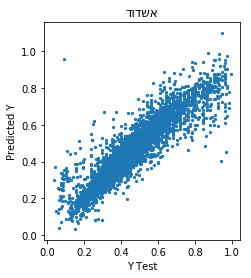

Mean squared error: 0.01
Mean squared error sqrt: 0.07573834770604022
Variance score: 0.83
אשקלון
(12399, 17)
(12399, 512)


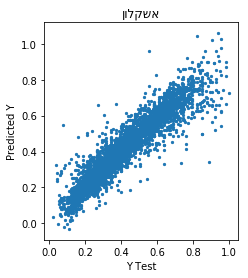

Mean squared error: 0.01
Mean squared error sqrt: 0.07099665436973669
Variance score: 0.86
נתניה
(12391, 17)
(12391, 540)


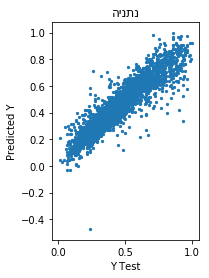

Mean squared error: 0.01
Mean squared error sqrt: 0.07351419930683087
Variance score: 0.86
ראשון לציון
(11431, 17)
(11431, 582)


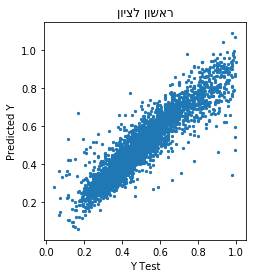

Mean squared error: 0.01
Mean squared error sqrt: 0.07201398087212742
Variance score: 0.84
חולון
(9624, 17)
(9624, 483)


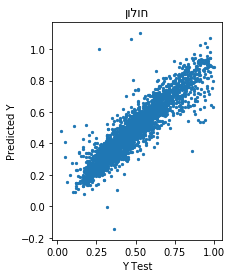

Mean squared error: 0.01
Mean squared error sqrt: 0.07414413764011056
Variance score: 0.84
רמת גן
(8707, 17)
(8707, 498)


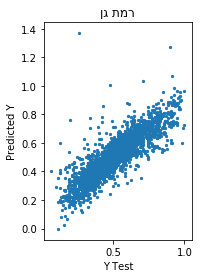

Mean squared error: 0.01
Mean squared error sqrt: 0.0853684838727828
Variance score: 0.76
בת ים
(7929, 17)
(7929, 383)


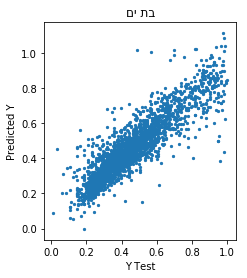

Mean squared error: 0.01
Mean squared error sqrt: 0.08585877862897769
Variance score: 0.80
רחובות
(7272, 17)
(7272, 469)


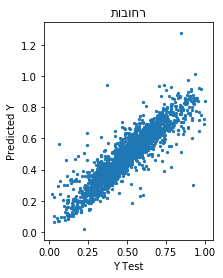

Mean squared error: 0.01
Mean squared error sqrt: 0.07445468170613162
Variance score: 0.82
חדרה
(6213, 17)
(6213, 455)


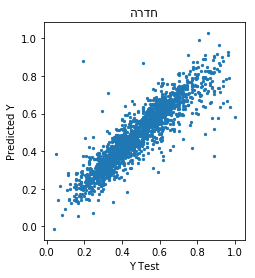

Mean squared error: 0.01
Mean squared error sqrt: 0.07450763582021878
Variance score: 0.81
נהריה
(5197, 17)
(5197, 356)


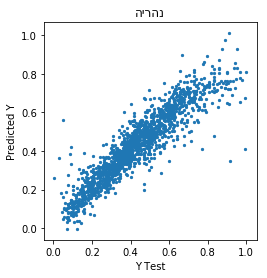

Mean squared error: 0.01
Mean squared error sqrt: 0.07709810469342687
Variance score: 0.84
אילת
(5010, 17)
(5010, 387)


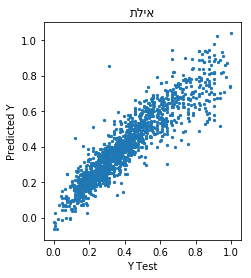

Mean squared error: 0.01
Mean squared error sqrt: 0.08367241603111912
Variance score: 0.84
קרית אתא
(4453, 17)
(4453, 404)


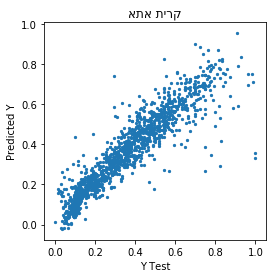

Mean squared error: 0.01
Mean squared error sqrt: 0.08231490567253609
Variance score: 0.84
עפולה
(3982, 17)
(3982, 384)


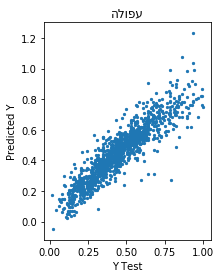

Mean squared error: 0.01
Mean squared error sqrt: 0.08157290586321182
Variance score: 0.83
בני ברק
(3299, 17)
(3299, 319)


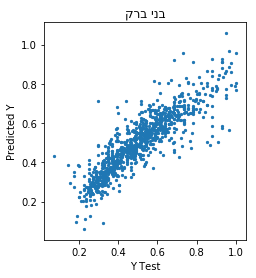

Mean squared error: 0.01
Mean squared error sqrt: 0.08439783163349573
Variance score: 0.76
לוד
(3158, 17)
(3158, 315)


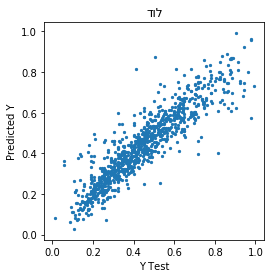

Mean squared error: 0.01
Mean squared error sqrt: 0.0820384006543442
Variance score: 0.82


In [7]:

for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    
    _df = remove_outlier(_df, 'final_price')
    
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    
    min_max_scalar = preprocessing.MinMaxScaler()
    y = min_max_scalar.fit_transform(np.array(y).reshape(-1, 1))
    y = pd.DataFrame(y)

    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)
    print(X.shape)
    
    # TODO: don't use, it takes too much time to estimate
    # poly = preprocessing.PolynomialFeatures(2, interaction_only=True, include_bias=False)
    # X = poly.fit_transform(X)
    # print(datetime.now())
    # print(X.shape)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
    
    lm = LinearRegression()
    lm.fit(X_train, y_train)

    predictions = lm.predict(X_test)
    plt.scatter(y_test, predictions, s=5)
    plt.title(bidialg.get_display(city))
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')

    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, predictions))
    print("Mean squared error sqrt:", sqrt(mean_squared_error(y_test, predictions)))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, predictions))

תל אביב יפו
Score: 0.7051
MSE sqrt: 593674.5945


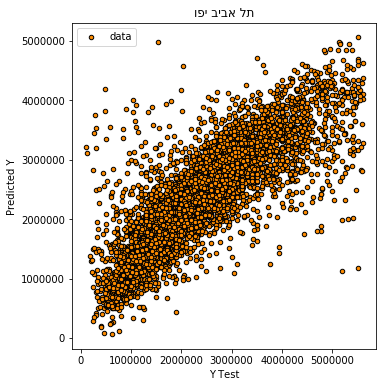

חיפה
Score: 0.8423
MSE sqrt: 197585.3737


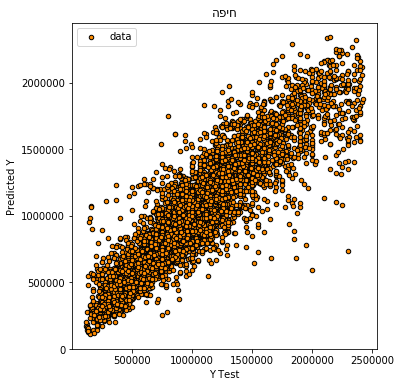

באר שבע
Score: 0.8797
MSE sqrt: 105870.7359


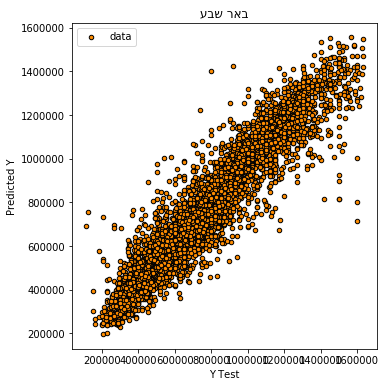

ירושלים
Score: 0.7639
MSE sqrt: 276441.4725


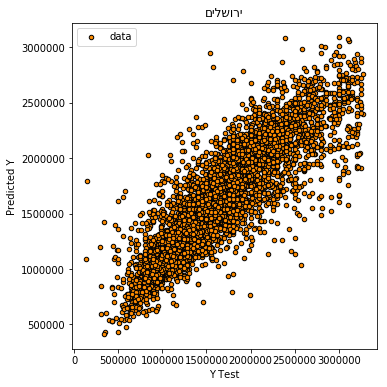

פתח תקווה
Score: 0.8583
MSE sqrt: 175765.9691


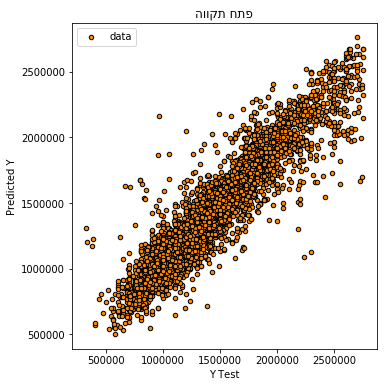

אשדוד
Score: 0.8336
MSE sqrt: 184491.0631


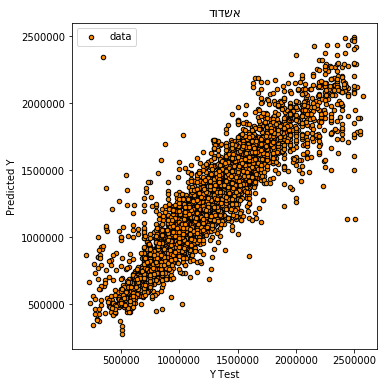

אשקלון
Score: 0.8694
MSE sqrt: 127230.5474


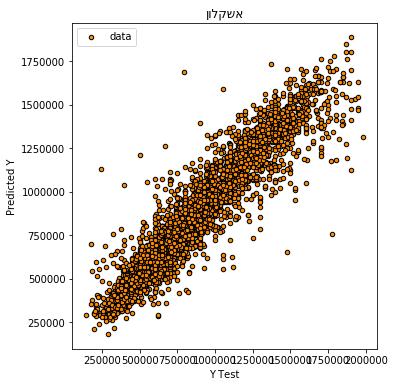

נתניה
Score: 0.8484
MSE sqrt: 217321.9886


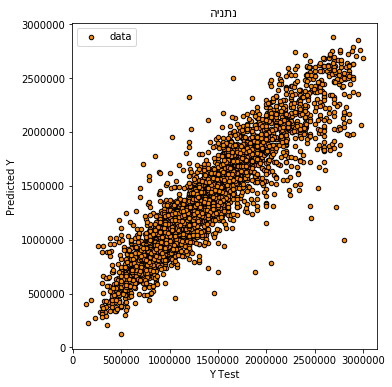

ראשון לציון
Score: 0.8404
MSE sqrt: 182884.7118


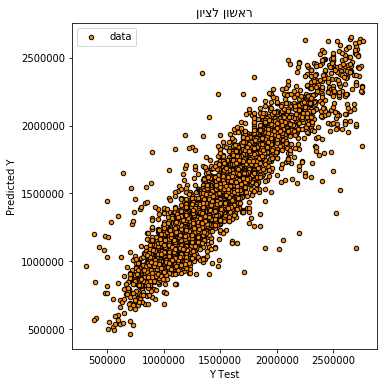

חולון
Score: 0.8595
MSE sqrt: 178115.5064


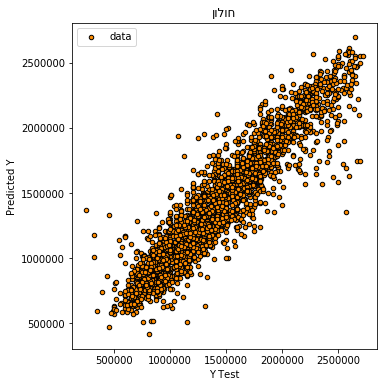

רמת גן
Score: 0.7739
MSE sqrt: 255958.2220


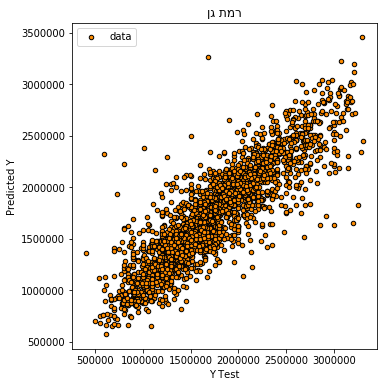

בת ים
Score: 0.8065
MSE sqrt: 198777.5511


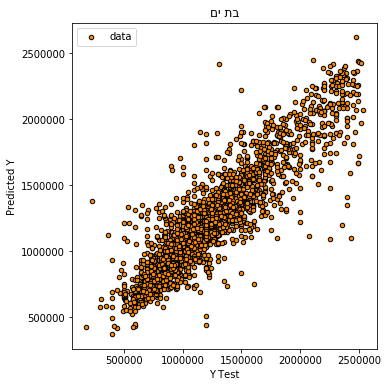

רחובות
Score: 0.8321
MSE sqrt: 162453.5395


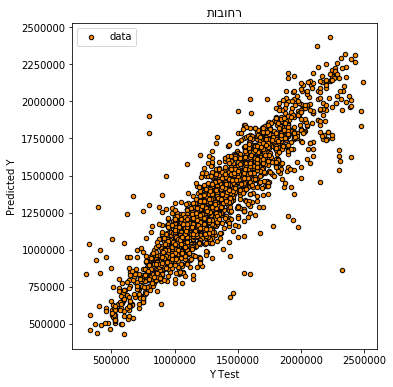

חדרה
Score: 0.8112
MSE sqrt: 158477.7907


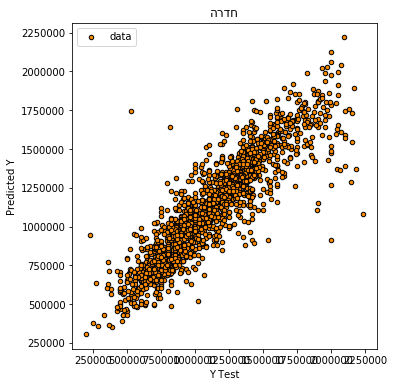

נהריה
Score: 0.8442
MSE sqrt: 146512.4247


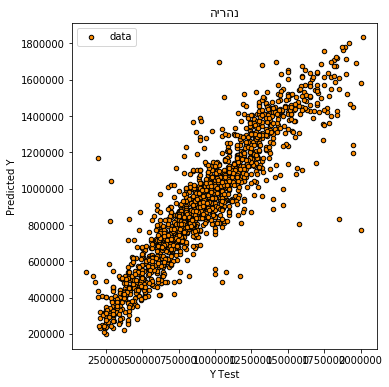

אילת
Score: 0.8404
MSE sqrt: 140682.6255


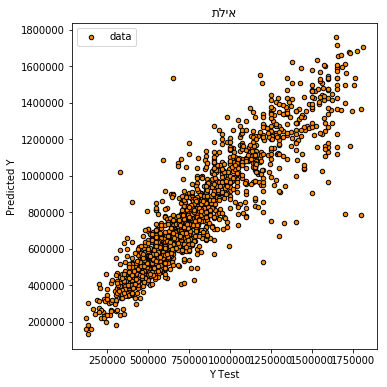

קרית אתא
Score: 0.8387
MSE sqrt: 165429.1358


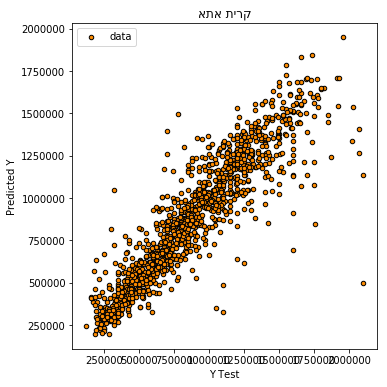

עפולה
Score: 0.8389
MSE sqrt: 107351.9254


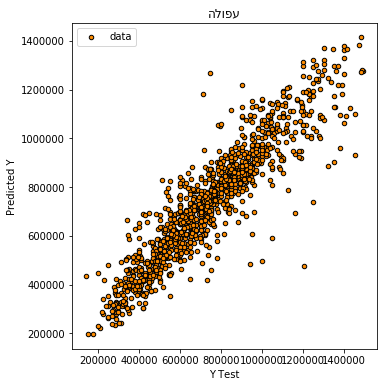

בני ברק
Score: 0.7760
MSE sqrt: 169840.8884


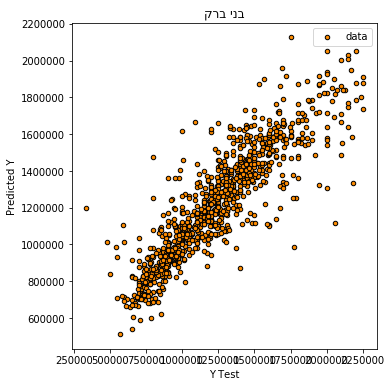

לוד
Score: 0.8371
MSE sqrt: 119630.3826


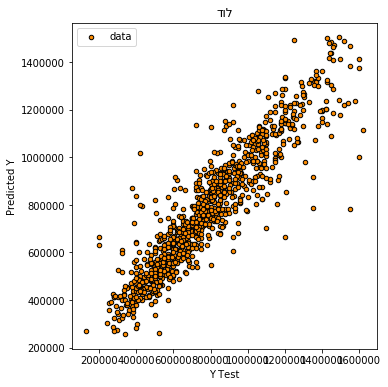

In [8]:
# https://towardsdatascience.com/create-a-model-to-predict-house-prices-using-python-d34fe8fad88f
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    
    _df = remove_outlier(_df, 'final_price')
    
    X = _df[used_features]
    y = _df['final_price']
#     print(X.shape)

    ohe = preprocessing.OneHotEncoder(handle_unknown='ignore')
    X = ohe.fit_transform(X)
    cities[city]["processor"] = ohe
#     print(X.shape)
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)
#     # for tuning parameters
#     from sklearn.model_selection import GridSearchCV
#     param_grip = {
#         'learning_rate': [0.1, 0.05, 0.02],
#         'max_depth': [4, 6, 8],
#         'min_samples_leaf': [1, 3],
#         'max_features': [1.0, 0.3]
#     }
#     clf = GradientBoostingRegressor(n_estimators=1000)
#     gs_cv = GridSearchCV(clf, param_grip).fit(X_train, y_train)
#     print(gs_cv.best_params_)
#     continue
    clf = GradientBoostingRegressor(n_estimators=450,
                                    max_depth=8,
                                    learning_rate=0.05,
                                    max_features=0.3,
                                    random_state=1)
    clf.fit(X_train, y_train)
    cities[city]["algo"] = clf
    y_pred = clf.predict(X_test)
    print("Score: %.4f" % clf.score(X_test, y_test))
    mse = mean_squared_error(y_test, clf.predict(X_test))
    print("MSE sqrt: %.4f" % sqrt(mse))
    
    # Plot the results
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred, s=20, edgecolor="black", c="darkorange", label="data")
    plt.xlabel('Y Test')
    plt.ylabel('Predicted Y')
    plt.title(bidialg.get_display(city))
    plt.legend()
    plt.show()


In [9]:
# באר שבע
d = {
    'street': ["דוד הראובני", "יצחק רגר", "משה פריבס", "מאיר גרוסמן", "התקווה"], 
    'neighborhood': ["נוה מנחם", "שכונה ב'", "רמות הרכס", "נאות אילן", "מרכז אזרחי"],
    'property_type': ["דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות", "דירת בבית קומות"], 
    'rooms_number': [4, 4, 4, 4, 4], 
    'floor': [2, 10, 2, 2, 2],
    'build_year': [2015, 2019, 2010, 2017, 2019],
    'building_mr': [115, 116, 120, 120, 113],
    'city': ["באר שבע", "באר שבע", "באר שבע", "באר שבע", "באר שבע"],
    'sale_day_year': [2019, 2019, 2019, 2019, 2019]
}
_X = pd.DataFrame(data=d)
print(_X.head())
_X = cities['באר שבע']["processor"].transform(_X)
y_pred = cities['באר שבע']["algo"].predict(_X)
print(y_pred.tolist())


        street neighborhood    property_type  rooms_number  floor  build_year  \
0  דוד הראובני     נוה מנחם  דירת בבית קומות             4      2        2015   
1     יצחק רגר     שכונה ב'  דירת בבית קומות             4     10        2019   
2    משה פריבס    רמות הרכס  דירת בבית קומות             4      2        2010   
3  מאיר גרוסמן    נאות אילן  דירת בבית קומות             4      2        2017   
4       התקווה   מרכז אזרחי  דירת בבית קומות             4      2        2019   

   building_mr     city  sale_day_year  
0          115  באר שבע           2019  
1          116  באר שבע           2019  
2          120  באר שבע           2019  
3          120  באר שבע           2019  
4          113  באר שבע           2019  
[1069199.5826868538, 1025730.6157909613, 1053456.5002428922, 1042527.4598020958, 1328987.366300862]


In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix


for city in cities.keys():
    print(city)
    _df = df.loc[(df['city'] == city)]
    
    _df = remove_outlier(_df, 'final_price')
    
    print(_df.shape)
    X = _df[used_features]
    y = _df['final_price']
    y, info = pd.qcut(np.array(y), 10, retbins=True)
    print(info)
    y = pd.DataFrame(y.codes)
    
    ohe = preprocessing.OneHotEncoder()
    X = ohe.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=101)

    rfc = RandomForestClassifier(n_estimators=150, random_state=1)
    rfc.fit(X_train,y_train)

    predictions = rfc.predict(X_test)
    print(classification_report(y_test,predictions))
    print(confusion_matrix(y_test,predictions))


תל אביב יפו
(21894, 17)
[ 100800. 1000000. 1319868. 1600000. 1860000. 2150000. 2450000. 2750000.
 3160000. 3850000. 5623100.]
              precision    recall  f1-score   support

           0       0.61      0.67      0.64       642
           1       0.51      0.47      0.49       651
           2       0.45      0.41      0.43       721
           3       0.38      0.39      0.38       587
           4       0.38      0.36      0.37       675
           5       0.36      0.38      0.37       640
           6       0.38      0.39      0.38       620
           7       0.38      0.32      0.35       687
           8       0.42      0.42      0.42       683
           9       0.54      0.62      0.57       663

   micro avg       0.44      0.44      0.44      6569
   macro avg       0.44      0.44      0.44      6569
weighted avg       0.44      0.44      0.44      6569

[[432 102  38  22  13   6   7   4  10   8]
 [136 305 114  28  27  14   4   6   8   9]
 [ 67 124 299 115  48  29  11

              precision    recall  f1-score   support

           0       0.64      0.72      0.68       368
           1       0.50      0.45      0.47       366
           2       0.38      0.41      0.39       378
           3       0.39      0.43      0.41       367
           4       0.29      0.28      0.28       361
           5       0.39      0.38      0.38       393
           6       0.40      0.39      0.40       370
           7       0.51      0.46      0.48       381
           8       0.47      0.51      0.49       360
           9       0.75      0.64      0.69       374

   micro avg       0.47      0.47      0.47      3718
   macro avg       0.47      0.47      0.47      3718
weighted avg       0.47      0.47      0.47      3718

[[265  60  30   6   5   1   1   0   0   0]
 [ 94 163  71  21   9   3   2   2   1   0]
 [ 26  72 154  73  29  13   7   1   3   0]
 [  7  18  82 159  66  22  11   2   0   0]
 [  8  10  40  73 102  80  26  16   5   1]
 [  7   2   8  44  76 151 

              precision    recall  f1-score   support

           0       0.71      0.76      0.74       164
           1       0.50      0.50      0.50       133
           2       0.44      0.48      0.46       162
           3       0.39      0.37      0.38       156
           4       0.44      0.43      0.43       164
           5       0.35      0.33      0.34       156
           6       0.38      0.37      0.38       172
           7       0.43      0.40      0.42       144
           8       0.49      0.47      0.48       150
           9       0.65      0.70      0.68       159

   micro avg       0.48      0.48      0.48      1560
   macro avg       0.48      0.48      0.48      1560
weighted avg       0.48      0.48      0.48      1560

[[125  27   8   2   0   1   0   1   0   0]
 [ 32  67  24   3   5   2   0   0   0   0]
 [ 12  28  78  30   6   5   2   0   0   1]
 [  1   5  42  58  20  15  11   0   3   1]
 [  1   0  16  27  70  23  14   6   5   2]
 [  0   2   4  12  29  52 

In [11]:
# saving objects
for city, values in cities.items():
    folder = os.path.join("pickles", city)
    if not os.path.exists(folder):
        os.mkdir(folder)
    joblib.dump(values["processor"], os.path.join(folder, "processor.joblib"))
    joblib.dump(values["algo"], os.path.join(folder, "algo.joblib"))

In [12]:
# to load:
cities = {city: {
    "processor": joblib.load(os.path.join("pickles", city, "processor.joblib")), 
    "algo": joblib.load(os.path.join("pickles", city, "algo.joblib"))
} for city in cities}